# 项目：用户行为分析

此项目主要针对的是用户消费行为分析，但所用的方法可以扩展到多方面，有极强的实际用途。

该项目的数据与用户ID，消费时间，购买量和消费金额相关，若用户行为不涉及消费，而是变成浏览时间、浏览量，或者是评论数，点击量，点赞数等等也可用本项目中涉及的方法和思想进行分析。

项目针对65659个用户消费数据进行分析，具体解决了以下问题：

1. 消费情况分析：平均消费额和购买量呈现典型的“二八”规律。

2. 消费趋势分析：发现随时间变化，购买量和消费金额都呈下降趋势。并发现某段时间的异常情况，推测可能原因。

3. 消费额与购买量相关性分析：检测用户数据是否异常，排除用户数据异常原因。

3. 用户购买能力/购买时间分析：大部分用户消费能力并不高，为小额购买用户。并发现此用户为部分用户数据，得到趋势异常的原因。

4. 复购率分析：1月的新客复购率只有5%左右，而到后期相对比较稳定，复购率都在20%左右。从新老客户看，老客户的复购率是新客户的4倍左右。

5. 回购率分析：新用户回购率约15%左右，稳定后约为30%左右。新客质量低于老客，老客的忠诚度（回购率）表现较好。

6. 构建用户画像，并对活跃用户以及回流用户分析：用户回流占比在5%～8%左右，用户活跃占比在3%～6%左右，同时有下降趋势。在后期的消费中，约60%是回流用户，40%是活跃用户。

7. 用户质量分析：少部分用户带来大部分收益，要狠抓高质量用户。

8. 用户生命周期分析：生命周期大于400天的高质量用户占比约为15%左右。消费超过两次以上的客户的生命周期均值为276天，远高于总体的生命周期。从策略上看，提高生命周期会带来2倍以上的增量。在客户消费50天内应采取相关措施，以延长生命周期。

9. 留存率分析/平均购买周期分析：只有约2.5%的客户在距第一次消费3天内会再次消费；约20%的客户在距第一次消费3个月到半年会再次消费；约26%的客户在半年至一年内会再次消费。在策略上，应注重用户忠诚度的培养，在一定时间内使用户再次购买，召回用户再次购买的时间间隔为70天左右是比较合适。
--------------------------------------------

## 背景分析及目标确定

### 背景分析
CDNOW是一家在线零售商。公司于1994年2月由双胞胎兄弟杰森汀和马修汀共同创立。公司在1994年8月推出telnet服务。公司在1994年9月成为一家零售网站。

不久之后，CDNOW收购其最大的竞争对手一家费城公司N2K，该公司旗下拥有：音乐大道，爵士中央火车站，以及其他流行网站。之后，公司将总部迁移到华盛顿堡，共有500人员工，公司在纽约，伦敦和洛杉矶设有办事处，收入超过1300万美元。到2000年，公司将员工精简到大约400名，之后公司被贝塔斯曼收购。

狭义上的用户行为分析，是指在获得网站访问量，购买量等等基本数据的情况下，对有关数据进行统计、分析，从中发现用户行为规律，并将这些规律与网络营销策略等相结合，从而发现目前网络营销活动中可能存在的问题，并为进一步修正或重新制定网络营销策略提供依据，对现实生活有着重要意义。

### 目标确定

1. 对用户消费情况进行异常监控

2. 为业务改进提供数据支持

-------
从用户和订单角度，时间变化趋势等方面监控整体情况，并进行消费额度和购买量相关性分析；从复购率，回购率，留存率，用户生命周期分析用户行为，并以活跃/不活跃/新用户和回流用户几个维度构建用户画像，分析各流量占比。


数据来源：CDNow网站1997年的用户消费数据,共69659条记录。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot')

## 数据加载
原文件是txt格式，并且以空格进行分隔数据。

原数据不包含表头，因此需要重新赋予名称。

In [2]:
columns = ['user_id', 'order_dt', 'order_products', 'order_amount']
df = pd.read_csv('CDNOW.txt', names=columns, sep='\s+')

In [6]:
df.head()

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


## 数据分析


In [9]:
df.describe()

,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


### 0 消费情况分析
主要针对每笔订单和每位用户消费的数量和金额进行分析。

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id           69659 non-null int64
order_dt          69659 non-null int64
order_products    69659 non-null int64
order_amount      69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


** 数据初步观察 **

user和orders：
1. user ---> orders : 一个用户可以创建多个订单， 一对多
2. orders ---> user : 一个订单只有一个用户创建， 一对一
       
每个order包含：order_dt，order_products，order_amount
1. order_dt：表示时间，但现在只是年月日组合的一串数字，没有时间含义。
2. order_products：每个order包含的商品个数
3. order_amount：订单金额

** 每笔订单消费情况分析 **

每笔订单平均购买2.4个，中位数是2，75分位是3，说明大部分订单的购买数量都不大。

购买金额平均为35.89，中位数为25.98，75分位是43.7，说明大部分订单购买金额都较小。

消费数据通常是‘二八’分布。

##### 时间数据类型转换
将月份作为消费行为的主要事件窗口，这取决于消费频率

In [9]:
df['order_date'] = pd.to_datetime(df.order_dt, format='%Y%m%d')
df['month'] = df.order_date.values.astype('datetime64[M]')

In [19]:
df.head()

,user_id,order_dt,order_products,order_amount,order_date,month
0,1,19970101,1,11.77,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997-03-01


##### 上面的消费行为数据粒度是每笔订单，现转换成每位用户

In [10]:
user_grouped = df.groupby('user_id').sum()
user_grouped.head()

,order_dt,order_products,order_amount
user_id,,,
1,19970101,1,11.77
2,39940224,6,89.00
3,119833602,16,156.46
4,79882233,7,100.50
5,219686137,29,385.61


In [11]:
user_grouped.describe()

,order_dt,order_products,order_amount
count,2.357000e+04,23570.000000,23570.000000
mean,5.902627e+07,7.122656,106.080426
std,9.460684e+07,16.983531,240.925195
min,1.997010e+07,1.000000,0.000000
25%,1.997021e+07,1.000000,19.970000
50%,1.997032e+07,3.000000,43.395000
75%,5.992125e+07,7.000000,106.475000
max,4.334408e+09,1033.000000,13990.930000


** 每位用户消费分析 **

每个用户平均购买7个商品，中位数是3，75分位是7。

每个用户平均消费额为106.08，中位数是43.39，75分位是106.47。

说明有少部分客户的购买数和消费额较大。

### 1 消费趋势分析
以月份作为时间的统计窗口

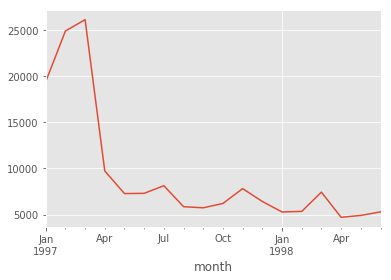

In [12]:
df.groupby('month').order_products.sum().plot()

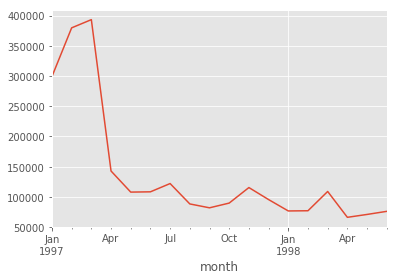

In [28]:
df.groupby('month').order_amount.sum().plot()

** 数据观察分析 **

前几个月销量高涨，较为异常，后几个月销量平缓。这同样也反映在了消费金额上，前几个月颇多，后面呈平缓下降趋势。

为什么会出现这样的原因？以下为可能的原因：

1. 用户数据存在异常值
2. 网站购买流程是否顺畅
3. ETL是否故障，造成取数，转换等过程出现失误
4. 是否有促销活动
5. 营销渠道是否有变更
6. 数据的局限性

这里只有消费数据，因此从是否有异常值开始查找。

### 2 消费额与购买量相关性分析
通过这种方法可以查找出是否存在异常数据。

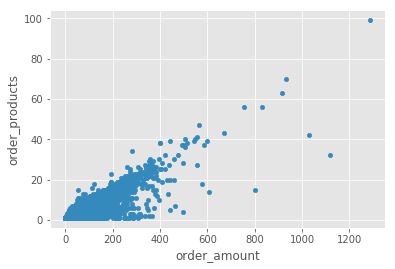

In [29]:
df.plot.scatter(x='order_amount', y='order_products')

** 数据观察分析 **

通过绘制散点图可以看出每笔订单中消费额与购买数量的相关性，以此来分析是否异常。

从图中可以看出每笔订单中消费额与购买数量较为规律，订单极值较少，超出1000的就几个，因此不是异常波动引起。


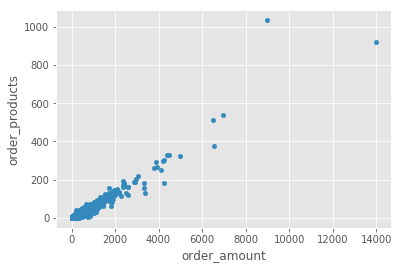

In [30]:
df.groupby('user_id').sum().plot.scatter(x='order_amount', y='order_products')

** 数据观察分析 **

通过绘制散点图可以看出每个用户的消费额与购买数量的相关性，以此来分析是否异常。

从图中可以看出消费额与购买数量较为规律，订单极值较少，说明用户比较健康，而且规律性比订单更强。因为这是CD网站的数据，商品比较单一，金额和购买量的关系也呈线性，没有什么离群点。

### 3 用户消费能力分析
消费能力的分布情况进行分析

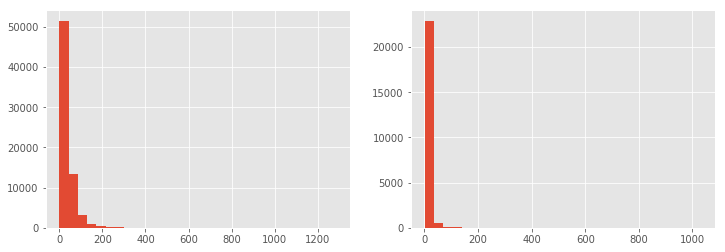

In [42]:
plt.figure(figsize=(12,4))
plt.subplot(121)
df.order_amount.hist(bins=30)
plt.subplot(122)
df.groupby('user_id').order_products.sum().hist(bins=30)

** 数据观察分析 **

直方图可以帮助我们观察用户消费能力的分布情况，从图中可以看出大部分用户的消费能力并不高，高消费的用户在图中几乎观察不到。这是符合消费行为行业规律的。

### 4 首次及末次消费时间分析

In [64]:
len(df.month.unique())

18

In [47]:
df.groupby('user_id').month.min().value_counts()

1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: month, dtype: int64

In [45]:
df.groupby('user_id').month.max().value_counts()

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: month, dtype: int64

** 数据观察分析 **

将用户分组，并求出用户第一次或最后一次消费时间，再进行个数统计。

从结果可以看出，所有用户的第一次消费时间都集中在前3个月。可以认为，这里的订单数据只是选择了某个时间段消费的用户在18个月内的消费行为。

用户最后一次消费时间可以看出，大部分依然集中在前3个月，之后虽然仍有用户在消费，但呈缓慢减少的趋势。

因此趋势异常的原因得到了解释，这只是部分用户的订单数据，所以有一定的局限性。

### 5 复购率分析
在这里统一将消费的用户定义为新客。

In [49]:
# 进行数据透视，统计每个用户在每个月的订单量
pivoted_counts = df.pivot_table(index='user_id', columns='month', values='order_dt', aggfunc='count').fillna(0) # 没有消费过的会呈现NaN，现用0填充
columns_month = df.month.sort_values().astype('str').unique() # 开始生成的是1997-01-01 00:00:00，因此将其优化成标准格式。
pivoted_counts.columns = columns_month
pivoted_counts.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [51]:
pivoted_counts_trans = pivoted_counts.applymap(lambda x:1 if x>1 else np.NaN if x==0 else 0)
pivoted_counts_trans.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


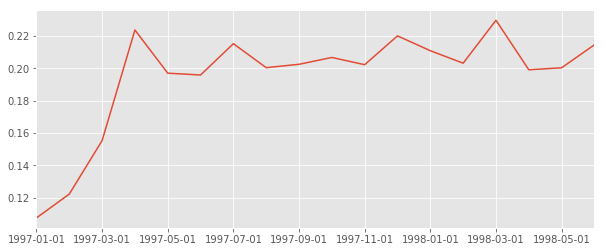

In [52]:
(pivoted_counts_trans.sum() / pivoted_counts_trans.count()).plot(figsize=(10,4))

** 数据观察分析 **

进行数据透视，统计每个用户在每个月的订单量，再求复购率。

复购率的定义是：在某时间窗口内消费两次及以上的用户在总消费用户的占比。

这里的时间窗口是月，如果一个用户在同一天下了两笔订单，这里也将他算做复购用户。

将数据进行转换，消费两次及以上的记为1，消费一次记为0，没有消费记为NaN。用sum和count相除则可计算出复购率，因为这两个函数都会忽略NaN。

从图中可以看出，复购率在早期较低，原因是大量新用户的加入，新客的复购率并不高。1月的新客复购率只有5%左右，而到后期相对比较稳定，复购率都在20%左右。

从新老客户看，老客户的复购率是新客户的4倍左右。

### 6 回购率分析

In [13]:
# 进行数据透视，统计每个用户在每个月的平均消费金额
pivoted_amount = df.pivot_table(index='user_id', columns='month', values='order_amount', aggfunc='mean').fillna(0)
columns_month = df.month.sort_values().astype('str').unique()
pivoted_amount.columns = columns_month
pivoted_amount.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,11.77,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
2,44.50,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
3,20.76,0.0,20.76,19.54,0.00,0.00,0.00,0.00,0.00,0.0,39.205,0.000,0.00,0.0,0.0,0.0,16.99,0.0
4,29.53,0.0,0.00,0.00,0.00,0.00,0.00,14.96,0.00,0.0,0.000,26.480,0.00,0.0,0.0,0.0,0.00,0.0
5,21.65,38.9,0.00,45.55,38.71,26.14,28.14,0.00,40.47,0.0,0.000,43.465,37.47,0.0,0.0,0.0,0.00,0.0


In [14]:
pivoted_purchase = pivoted_amount.applymap(lambda x:1 if x>0 else 0)
pivoted_purchase.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [15]:
def purchase_return(x): # x：用户在18个月的消费情况
    l = [] # 保存用户是否回购字段
    for i in range(17): # 有18个月，每个月都要进行判断
        if x[i] ==1: # 用户本月进行过消费
            if x[i+1]==1: # 用户下月进行过消费
                l.append(1)
            if x[i+1]==0:
                l.append(0)
        else: # 用户本月没有消费
            l.append(np.NaN) 
    l.append(np.NaN) # 由于没有第19个月与第18个月比较，因此赋值NaN
    return l
pivoted_purchase_return = pivoted_purchase.apply(lambda x:purchase_return(x), axis=1)
pivoted_purchase_return.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


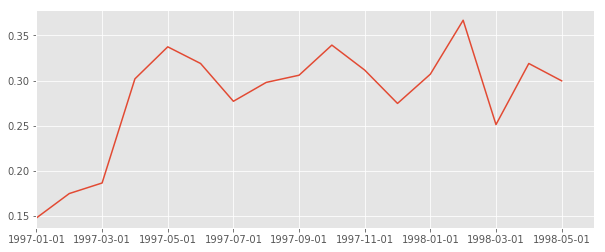

In [111]:
(pivoted_purchase_return.sum() / pivoted_purchase_return.count()).plot(figsize=(10,4))

** 数据观察分析 **

进行数据透视，统计每个用户在每个月的平均消费金额。

回购率：某一个时间窗口内消费的用户，在下一个时间窗口仍然消费的占比。

将数据进行转换，有消费（一次及以上）的记为1，没有消费记为0。

从结果可以看出，它与复购率类似，但波动性更大，而且比复购率高，新用户回购率约15%左右，稳定后约为30%左右。

结合复购率和回购率综合分析，新客质量低于老客，老客的忠诚度（回购率）表现较好。

### 7 按用户消费行为构建用户画像
简单划分为以下几个维度：
新用户，活跃用户，不活跃用户，回流用户。
1. 新用户：第一次消费客户
2. 活跃用户：在某个时间窗口内有消费的老客
3. 不活跃用户：时间窗口内没有消费的老客
4. 回流用户：在上一个时间窗口没有消费，但在当前时间窗口有消费的客户

In [106]:
def active_status(data):
    status=[]
    for i in range(18):
        # 本月无消费
        if data[i]==0:
            if len(status)>0:
                if status[i-1]=='unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
        # 本月有消费       
        else:
            if len(status)==0:
                status.append('new')
            else:
                if status[i-1]=='unactive':
                    status.append('return')
                elif status[i-1] =='unreg':
                    status.append('new')
                else:
                    status.append('active')
    return status
pivoted_purchase_status = pivoted_purchase.apply(lambda x: active_status(x), axis=1)
pivoted_purchase_status.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive


#### 7.1 计算每个月的新客数，活跃量，不活跃量，回流量
排除unreg状态，因为它是未来才作为新客出现，所以不参与计数

In [112]:
purchase_status_counts = pivoted_purchase_status.replace('unreg', np.NaN).apply(lambda x: pd.value_counts(x))
purchase_status_counts

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
active,NaN,1155.0,1680,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624,632.0,512.0,472.0,569.0,517.0,458.0,446.0
new,7814.0,8455.0,7231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1402,1232.0,1025.0,1079.0,1489.0,919.0,1030.0,1060.0
unactive,NaN,6659.0,13994,20678.0,21286.0,21161.0,21320.0,21728.0,21761.0,21661.0,21474,21638.0,21965.0,21951.0,21444.0,22066.0,22014.0,21996.0


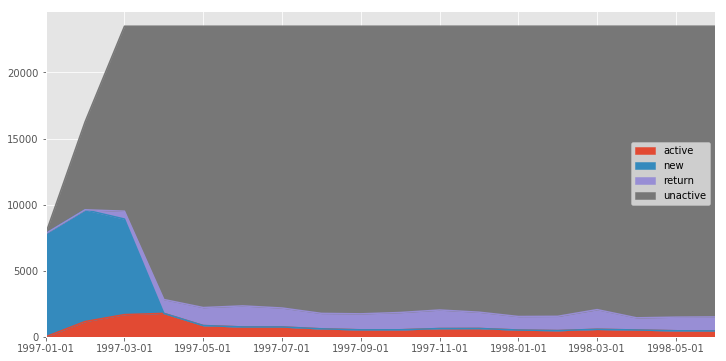

In [114]:
purchase_status_counts.fillna(0).T.plot.area(figsize=(12,6))

** 数据观察和分析 **

对于这个图，主要观察红色层active和紫色层return的用户量，用户数相对比较稳定。当没有新客增加时，这两层之和为总的消费用户量。

#### 7.2 计算各流量占比
新客数，活跃量，不活跃量，回流量占总体的比例

In [120]:
return_rate = purchase_status_counts.apply(lambda x: x/x.sum(), axis=1)
return_rate

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
active,NaN,0.089904,0.130770,0.138009,0.066319,0.058146,0.058068,0.047015,0.041099,0.041410,0.048572,0.049194,0.039854,0.036740,0.044290,0.040243,0.035650,0.034716
new,0.332482,0.359757,0.307676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000085,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,0.031392,0.055345,0.071858,0.083993,0.075657,0.061623,0.063892,0.068956,0.073969,0.064999,0.054078,0.056927,0.078559,0.048486,0.054342,0.055925
unactive,NaN,0.019313,0.040586,0.059972,0.061735,0.061373,0.061834,0.063017,0.063113,0.062823,0.062280,0.062756,0.063704,0.063664,0.062193,0.063997,0.063846,0.063794


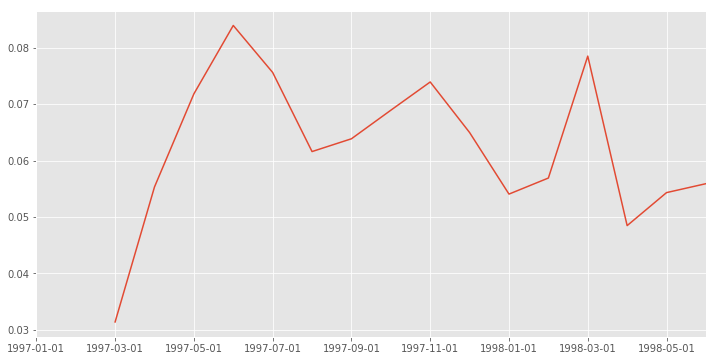

In [121]:
return_rate.loc['return'].plot(figsize=(12,6))

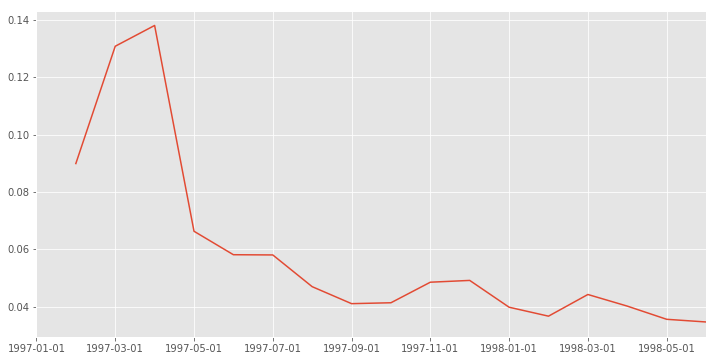

In [122]:
return_rate.loc['active'].plot(figsize=(12,6))

** 数据观察和分析 **

用户回流占比：回流用户与总用户的比值。

从图中可以看到，用户回流占比在5%～8%左右，同时有下降趋势。


用户活跃占比：活跃用户与总用户的比值。

从图中可以看到，用户活跃占比在3%～6%左右，同时有比回流占比更加明显的下降趋势。活跃用户可以看作连续消费用户，因此这些用户的质量要比回流用户的质量要高。


结合回流用户和活跃用户看，在后期的消费中，约60%是回流用户，40%是活跃用户（连续消费用户）

### 8 用户质量分析

In [125]:
user_amount = df.groupby('user_id').order_amount.sum().sort_values().reset_index()
user_amount['amount_cumsum'] = user_amount.order_amount.cumsum()
user_amount.tail()

,user_id,order_amount,amount_cumsum
23565,7931,6497.18,2463822.60
23566,19339,6552.70,2470375.30
23567,7983,6973.07,2477348.37
23568,14048,8976.33,2486324.70
23569,7592,13990.93,2500315.63


In [126]:
amount_total = user_amount.amount_cumsum.max()
user_amount['prop'] = user_amount.apply(lambda x:x.amount_cumsum/amount_total, axis=1)
user_amount.tail()

,user_id,order_amount,amount_cumsum,prop
23565,7931,6497.18,2463822.60,0.985405
23566,19339,6552.70,2470375.30,0.988025
23567,7983,6973.07,2477348.37,0.990814
23568,14048,8976.33,2486324.70,0.994404
23569,7592,13990.93,2500315.63,1.000000


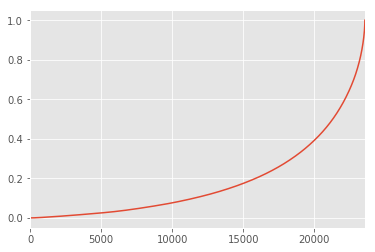

In [127]:
# 绘制消费金额趋势图，横坐标是按贡献金额排序而成的用户，纵坐标是用户累积贡献。
user_amount.prop.plot()

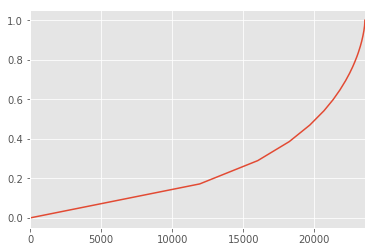

In [128]:
# 绘制销量图
user_counts = df.groupby('user_id').order_dt.count().sort_values().reset_index()
user_counts['counts_cumsum'] = user_counts.order_dt.cumsum()
counts_total = user_counts.counts_cumsum.max()
user_counts['prop'] = user_counts.apply(lambda x:x.counts_cumsum/counts_total, axis=1)
user_counts.prop.plot()

** 数据观察分析 **

从消费金额的趋势图可以看到，前20000个用户贡献了约40%的消费额，后4000个用户贡献了约60%的消费金额。

从销量趋势图可以看出，前20000个用户贡献了约45%的销量，后4000个用户贡献了约55%的销量。

综上所述，要狠抓高质量用户。

### 9 用户生命周期分析
用户生命周期：第一次消费到最后一次消费之间。

In [136]:
user_purchase = df[['user_id','order_products','order_amount','order_date']]
order_date_min = user_purchase.groupby('user_id').order_date.min()
order_date_max = user_purchase.groupby('user_id').order_date.max()
life_time = order_date_max - order_date_min
life_time.head()

user_id
1     0 days
2     0 days
3   511 days
4   345 days
5   367 days
Name: order_date, dtype: timedelta64[ns]

In [137]:
life_time.mean()

Timedelta('134 days 20:55:36.987696')

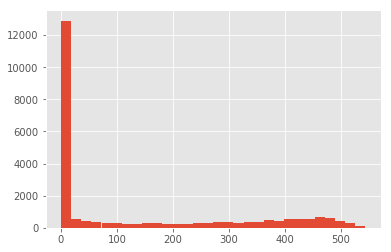

In [138]:
# 查看分布
(life_time / np.timedelta64(1,'D')).hist(bins=30) 
# np.timedelta64(1,'D')用来把类型是timedelta的时间转换成数值，这样才能作出直方图，D表示天，1表示1天，作为单位使用。

In [139]:
life_time.describe()

count                       23570
mean     134 days 20:55:36.987696
std      180 days 13:46:43.039788
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%             294 days 00:00:00
max             544 days 00:00:00
Name: order_date, dtype: object

** 数据观察和分析 **

用户的平均生命周期是134天，最大为544天。虽然平均为134天，但中位数为0天，通过分布图可以看出大部分用户只消费了一次，但我们更希望观察到消费超过两次以上的客户的生命周期分布。

In [142]:
life_time = life_time.reset_index()
life_time.head()

,user_id,order_date
0,1,0 days
1,2,0 days
2,3,511 days
3,4,345 days
4,5,367 days


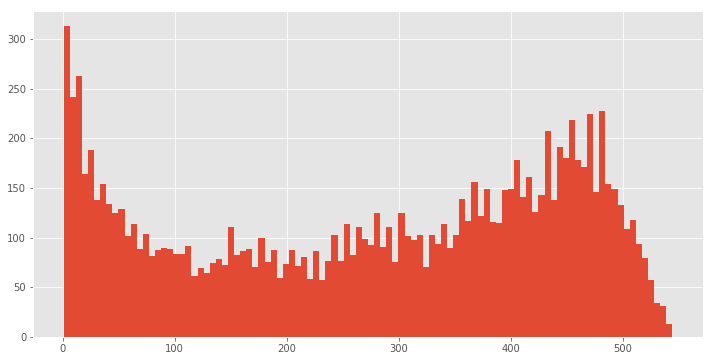

In [143]:
life_time['life_time'] = life_time.order_date / np.timedelta64(1, 'D')
life_time[life_time.life_time>0].life_time.hist(bins=100,figsize=(12,6))

In [147]:
# 生命周期大于400天的高质量用户占比
len(life_time[life_time.life_time>400]) / len(life_time)

0.15490029698769622

In [149]:
life_time[life_time.life_time>0].describe()

,user_id,order_date,life_time
count,11516.000000,11516,11516.000000
mean,11718.596301,276 days 01:04:31.344216,276.044807
std,6822.464439,166 days 15:12:56.722760,166.633990
min,3.000000,1 days 00:00:00,1.000000
25%,5747.750000,117 days 00:00:00,117.000000
50%,11778.000000,302 days 00:00:00,302.000000
75%,17632.500000,429 days 00:00:00,429.000000
max,23570.000000,544 days 00:00:00,544.000000


In [150]:
276/134

2.0597014925373136

** 数据观察及分析 **

通过观察消费超过两次以上的客户的生命周期分布图，可以知道这是一个双峰分布图。有不少用户的生命周期仍集中在0天附近，说明这部分用户虽然消费了两次或以上，但质量仍较差。部分用户的生命周期集中在50～300天，这部分用户就是质量普通的用户。400天以上的这些用户则为质量较高的用户，他们的忠诚度较高。

在客户消费50天内应尽量引导或采取些措施，以延长生命周期。生命周期大于400天的高质量用户占比约为15%左右。消费超过两次以上的客户的生命周期均值为276天，远高于总体的生命周期。从策略上看，提高生命周期会带来2倍以上的增量。

### 10 留存率分析
留存率：进行第一次消费后，再进行第二次消费的概率。
和回流率的区别是留存倾向于计算第一次消费，并且有多个时间窗口。

In [151]:
user_purchase.head()

,user_id,order_products,order_amount,order_date
0,1,1,11.77,1997-01-01
1,2,1,12.00,1997-01-12
2,2,5,77.00,1997-01-12
3,3,2,20.76,1997-01-02
4,3,2,20.76,1997-03-30


In [152]:
# 用户第一次消费时间
order_date_min.reset_index().head()

,user_id,order_date
0,1,1997-01-01
1,2,1997-01-12
2,3,1997-01-02
3,4,1997-01-01
4,5,1997-01-01


In [155]:
# 将用户消费行为和第一次消费对应上
user_purchase_retention = pd.merge(left = user_purchase, right = order_date_min.reset_index(), 
                                   how='inner', on='user_id', suffixes=('', '_min'))

user_purchase_retention.head()

,user_id,order_products,order_amount,order_date,order_date_min
0,1,1,11.77,1997-01-01,1997-01-01
1,2,1,12.00,1997-01-12,1997-01-12
2,2,5,77.00,1997-01-12,1997-01-12
3,3,2,20.76,1997-01-02,1997-01-02
4,3,2,20.76,1997-03-30,1997-01-02


In [157]:
# 用户每一次消费距第一次消费的时间差
user_purchase_retention['order_date_diff'] = user_purchase_retention.order_date - user_purchase_retention.order_date_min
user_purchase_retention.head()

,user_id,order_products,order_amount,order_date,order_date_min,order_date_diff
0,1,1,11.77,1997-01-01,1997-01-01,0 days
1,2,1,12.00,1997-01-12,1997-01-12,0 days
2,2,5,77.00,1997-01-12,1997-01-12,0 days
3,3,2,20.76,1997-01-02,1997-01-02,0 days
4,3,2,20.76,1997-03-30,1997-01-02,87 days


In [158]:
# 类型转换
date_trans = lambda x:x/np.timedelta64(1,'D')
user_purchase_retention['date_diff'] = user_purchase_retention.order_date_diff.apply(date_trans)
user_purchase_retention.head()

,user_id,order_products,order_amount,order_date,order_date_min,order_date_diff,date_diff
0,1,1,11.77,1997-01-01,1997-01-01,0 days,0.0
1,2,1,12.00,1997-01-12,1997-01-12,0 days,0.0
2,2,5,77.00,1997-01-12,1997-01-12,0 days,0.0
3,3,2,20.76,1997-01-02,1997-01-02,0 days,0.0
4,3,2,20.76,1997-03-30,1997-01-02,87 days,87.0


In [159]:
# 将时间分组
# date_diff=0没有被划分入任何一组，因为计算的是留存率，如果用户只在一天有消费（包括消费一次或多次），但之后无消费，也算做留存率0.
bin = [0,3,7,15,30,60,90,180,365]
user_purchase_retention['date_diff_bin'] = pd.cut(user_purchase_retention.date_diff, bins=bin)
user_purchase_retention.head(10)

,user_id,order_products,order_amount,order_date,order_date_min,order_date_diff,date_diff,date_diff_bin
0,1,1,11.77,1997-01-01,1997-01-01,0 days,0.0,NaN
1,2,1,12.00,1997-01-12,1997-01-12,0 days,0.0,NaN
2,2,5,77.00,1997-01-12,1997-01-12,0 days,0.0,NaN
3,3,2,20.76,1997-01-02,1997-01-02,0 days,0.0,NaN
4,3,2,20.76,1997-03-30,1997-01-02,87 days,87.0,"(60, 90]"
5,3,2,19.54,1997-04-02,1997-01-02,90 days,90.0,"(60, 90]"
6,3,5,57.45,1997-11-15,1997-01-02,317 days,317.0,"(180, 365]"
7,3,4,20.96,1997-11-25,1997-01-02,327 days,327.0,"(180, 365]"
8,3,1,16.99,1998-05-28,1997-01-02,511 days,511.0,NaN
9,4,2,29.33,1997-01-01,1997-01-01,0 days,0.0,NaN


In [162]:
pivoted_retention = user_purchase_retention.pivot_table(index='user_id',columns='date_diff_bin',
                                                        values='order_amount', aggfunc=sum)
# 值是用户在各时间段的消费总额
pivoted_retention.head(10)

date_diff_bin,"(0, 3]","(3, 7]","(7, 15]","(15, 30]","(30, 60]","(60, 90]","(90, 180]","(180, 365]"
user_id,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,40.3,NaN,78.41
4,NaN,NaN,NaN,29.73,NaN,NaN,NaN,41.44
5,NaN,NaN,13.97,NaN,38.90,NaN,110.40,155.54
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.43
8,NaN,NaN,NaN,NaN,13.97,NaN,45.29,104.17
9,NaN,NaN,NaN,NaN,NaN,NaN,30.33,NaN


In [163]:
# 用户在各时间段的平均消费额
pivoted_retention.mean()

date_diff_bin
(0, 3]        35.905798
(3, 7]        36.385121
(7, 15]       42.669895
(15, 30]      45.964649
(30, 60]      50.215070
(60, 90]      48.975277
(90, 180]     67.223297
(180, 365]    91.960059
dtype: float64

In [164]:
# 将数据转换，没有消费的为0，有消费的为1
pivoted_retention_trans = pivoted_retention.fillna(0).applymap(lambda x:1 if x>0 else 0)
pivoted_retention_trans.head()

date_diff_bin,"(0, 3]","(3, 7]","(7, 15]","(15, 30]","(30, 60]","(60, 90]","(90, 180]","(180, 365]"
user_id,,,,,,,,
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1
4,0,0,0,1,0,0,0,1
5,0,0,1,0,1,0,1,1


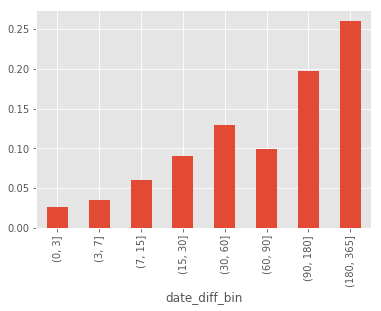

In [165]:
# 各时间段消费数量占整体的比例
(pivoted_retention_trans.sum() / pivoted_retention_trans.count()).plot.bar()

** 数据观察和分析 **

从用户在各时间段的平均消费额可以看出，后面的消费额更高，但它的时间范围更宽，所以在第一次消费后的0～3天内，消费额可能更多。

从各时间段消费数量占整体的比例图可以发现，只有约2.5%的客户在距第一次消费3天内会再次消费；约20%的客户在距第一次消费3个月到半年会再次消费；约26%的客户在半年至一年内会再次消费。

在策略上，应注重用户忠诚度的培养，在一定时间内使用户再次购买。

In [169]:
# 查看输出的是什么
grouped = user_purchase_retention.groupby('user_id')
i = 0
for user, group in grouped:
    print(group)
    i+=1
    if i==2:
        break

   user_id  order_products  order_amount order_date order_date_min  \
0        1               1         11.77 1997-01-01     1997-01-01   

  order_date_diff  date_diff date_diff_bin  
0          0 days        0.0           NaN  
   user_id  order_products  order_amount order_date order_date_min  \
1        2               1          12.0 1997-01-12     1997-01-12   
2        2               5          77.0 1997-01-12     1997-01-12   

  order_date_diff  date_diff date_diff_bin  
1          0 days        0.0           NaN  
2          0 days        0.0           NaN  


In [170]:
# 计算用户购买周期
def diff(group):
    d = group.date_diff - group.date_diff.shift(-1) # 使用shift(-1)下移一个位置
    return d
last_diff = user_purchase_retention.groupby('user_id').apply(diff)
last_diff.head(10)

user_id   
1        0      NaN
2        1      0.0
         2      NaN
3        3    -87.0
         4     -3.0
         5   -227.0
         6    -10.0
         7   -184.0
         8      NaN
4        9    -17.0
Name: date_diff, dtype: float64

In [171]:
# 计算用户平均购买周期
last_diff.mean()

-68.97376814424265

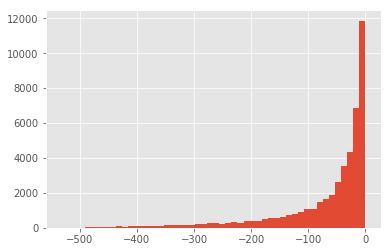

In [174]:
# 用户消费间隔分布
last_diff.hist(bins=50)

** 数据观察和分析 **

用户平均购买周期约为69天，所以为了培养客户忠诚度，召回用户再次购买的时间间隔为70天左右是比较合适的。

从消费间隔分布直方图可以看出，这是一个长尾分布，大部分用户的消费间隔确实比较短。因此还可以增加一些促销策略，比如消费后赠送优惠券，消费后10天询问用户商品如何，消费后30天提醒优惠券到期，消费后60天进行短信推送等等。